<a href="https://colab.research.google.com/github/jainakki16/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [486]:
import pandas as pd
import numpy as np

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [487]:
data = pd.read_csv('https://raw.githubusercontent.com/jainakki16/Stroke-Prediction/main/dataset.csv')
# data = pd.read_csv('/content/dataset.csv')
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
808,21397,Female,40.0,0,0,Yes,Govt_job,Urban,122.74,23.3,Unknown,0
3195,24177,Female,57.0,1,0,Yes,Private,Urban,90.77,43.9,formerly smoked,0
4623,37668,Male,25.0,0,0,Yes,Govt_job,Urban,166.38,23.1,never smoked,0
2664,61339,Male,47.0,0,0,Yes,Self-employed,Urban,95.04,28.7,never smoked,0
741,55592,Male,71.0,0,0,Yes,Private,Rural,109.73,28.9,never smoked,0


In [488]:
data.shape 

(5110, 12)

In [489]:
data.rename(columns={'Residence_type':'residence_type', 'ever_married':'marital_status'}, inplace=True)
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'marital_status', 'work_type', 'residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   marital_status     5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EDA

In [491]:
stroke_df = data.copy(deep=True)
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [492]:
stroke_df.replace(to_replace='Unknown', value=np.nan, inplace=True)

In [493]:
stroke_df.duplicated().sum()

0

In [494]:
stroke_df = stroke_df.astype({'age':int})

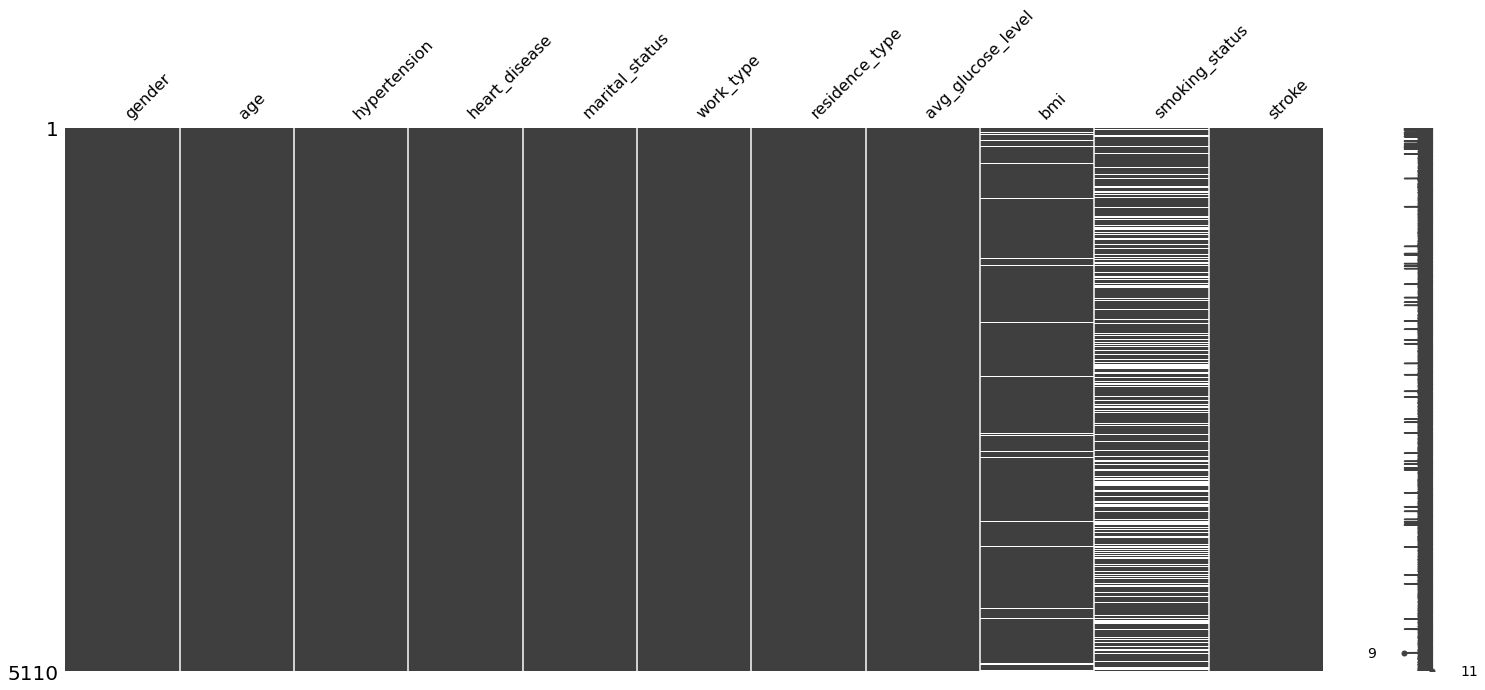

In [495]:
msno.matrix(stroke_df)
plt.show()

In [496]:
stroke_df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
marital_status          0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [497]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'marital_status',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Categorical Features** --> gender, marital_status, work_type,residence_type, smoking_status

**Quantative Features** --> 
*   **Discrete** --> id, hypertension, heart_disease
*   **Continuous** --> avg_glucose_level, bmi


  
  



# Univariate Analysis

## Helper Functions

In [498]:
def get_pie_chart(data, labels, title): 
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))

  ax.pie(x = data, 
        labels = labels, 
        explode = [0, 0.2],
        autopct = '%1.1f%%', 
        textprops = {'fontsize': 14}, 
        shadow = True)

  ax.set_title(title, size=14)
  plt.show()

In [499]:
def get_categ_plot(data):
  fig, ax = plt.subplots(3, 1, figsize=(11, 9), sharex=True)

  sns.distplot(x=data, ax=ax[0], kde=True)
  ax[0].set_title('Distplot')

  sns.boxplot(x=data, ax=ax[1])
  ax[1].set_title('Boxplot')

  sns.violinplot(x=data, ax=ax[2])
  ax[2].set_title('Violinplot')

  plt.show()

In [500]:
def horizontal_bars(name,prop,title):
  '''
  name: column name
  prop: proportion of male/female show-up 
  title: title of graph
  return: horizontal bar graph
  '''
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop, color=['green', 'red'])

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nProportion of strokes',fontsize=12)
  plt.ylabel('Stroke',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

In [501]:
def get_barplot(feature, bin_labels, bin_edges, xlab, ylab, title, line=False):

  def get_stroke_rel(feature,bin_labels,bin_edges):
    stroke_rel = stroke_df[[feature, 'stroke']]
    stroke_rel['type_level'] = pd.cut(x = stroke_rel[feature], bins = bin_edges, labels=bin_labels)
    no_strokes = stroke_rel.groupby(by='type_level').sum().stroke
    total_people = stroke_rel.groupby(by='type_level').count().stroke
    prop_stroke = (no_strokes/total_people*100).reset_index(name='prop_of_stroke')
    return prop_stroke

  prop_stroke = get_stroke_rel(feature,bin_labels,bin_edges)

  fig, ax = plt.subplots(1, 1, figsize=(8, 6))

  plot = sns.barplot(data=prop_stroke,x='type_level', y='prop_of_stroke',
              palette='Blues',edgecolor='black')
  if line:
    sns.lineplot(data=prop_stroke, x='type_level', y='prop_of_stroke',
                 color='green', linewidth=2.5, linestyle='dashed',
                 alpha=0.5, marker='o', markerfacecolor='red', 
                 markeredgecolor='white', markersize=7.5)

  # Change bar width
  for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .5
    patch.set_width(.5)
    patch.set_x(patch.get_x() + diff * .5)

  # Add text 
  for index, row in prop_stroke.iterrows():
    plot.text(x=index, y=row['prop_of_stroke']*1.04, 
              s="{:.2f}".format(row['prop_of_stroke']), 
              ha='center', color='black', weight='bold')

  plt.xlabel('\n' + xlab,fontsize=13)
  plt.ylabel('\n' + ylab,fontsize=13)
  plt.title('\n' + title + '\n',fontsize=17)
  plt.xticks(fontsize=12,rotation=45)
  plt.yticks(fontsize=12)
  sns.despine( left=True, bottom=True)

  plt.show()

## Categorical Variables

Univariate Analysis of Categorical Variables

### Binary Variables

Univariate Analysis of Categorical Binary Variables

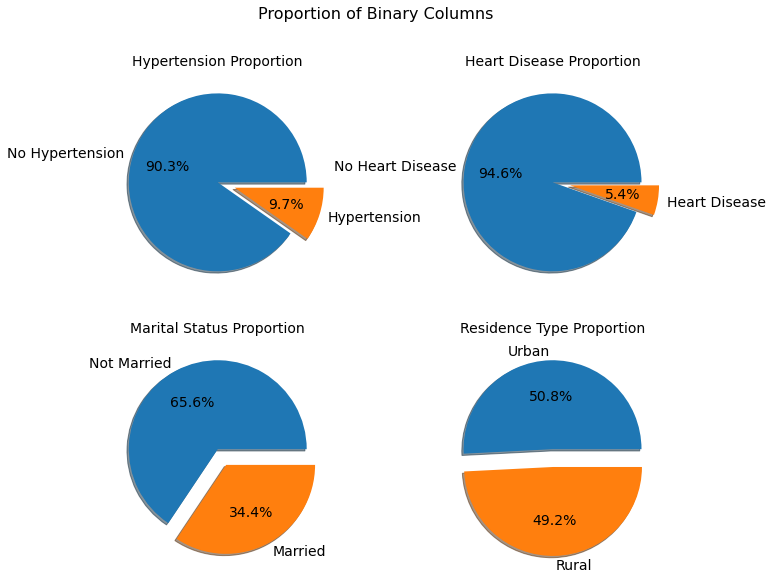

In [502]:
fig, ax = plt.subplots(2, 2, figsize=(11, 9))
binary_feature = ['hypertension','heart_disease','marital_status','residence_type']

for i in range(len(binary_feature)):
  feature = binary_feature[i]
  prop_data = stroke_df[feature].value_counts(normalize=True)
  feature = ' '.join(feature.split('_')).title()

  if feature == 'Marital Status':
    labels = ['Not Married', 'Married']
  elif feature == 'Residence Type':
    labels = prop_data.index
  else:
    labels = ['No '+ feature,feature]
  
  ax[i // 2,i % 2].pie(x = prop_data, 
      labels = labels,
      explode = [0, 0.2],
      autopct = '%1.1f%%', 
      textprops = {'fontsize': 14}, 
      shadow = True)
  ax[i // 2,i % 2].set_title(feature+' Proportion', size=14)
fig.suptitle('Proportion of Binary Columns',size=16)    
plt.show()

### Non-Binary variables

Univariate Analysis of Non-Categorical Binary Variables

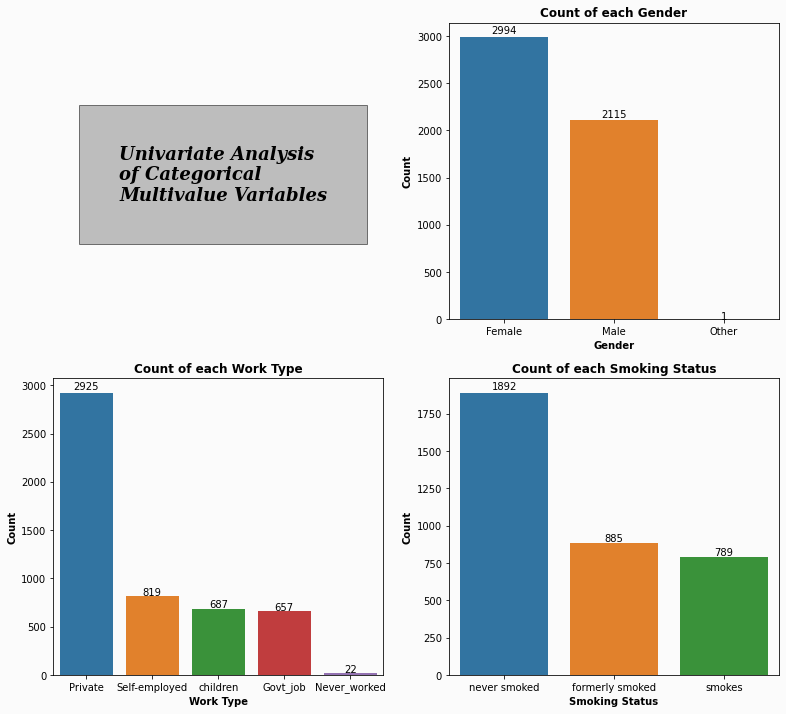

In [503]:
non_bin_columns = ['','gender','work_type', 'smoking_status']

fig, ax = plt.subplots(2, 2, figsize=(13, 12))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

for i in range(len(non_bin_columns)):
  ax[i // 2,i % 2].set_facecolor(background_color)
  if i == 0:
    ax[i // 2,i % 2].text(x=0.2, y=0.4, 
                          s='Univariate Analysis \nof Categorical \nMultivalue Variables', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    feature = non_bin_columns[i]
    feature_count = stroke_df[feature].value_counts().reset_index().rename(columns={feature:'count', 'index':feature})
    plot = sns.barplot(data=feature_count, y='count', x=feature,ax=ax[i // 2,i % 2])

    for index, row in feature_count.iterrows():
        plot.text(x=index, y=row['count']*1.012, s=row['count'], 
                  ha='center', color='black')
    
    feature = ' '.join(feature.split('_')).title()
    ax[i // 2,i % 2].set_title('Count of each '+ feature, fontsize=12, fontweight='bold')
    ax[i // 2,i % 2].set_xlabel(feature, fontweight='bold')
    ax[i // 2,i % 2].set_ylabel('Count', fontweight='bold')
plt.show()

## Continuous Variables
Univariate Analysis of Categorical Variables

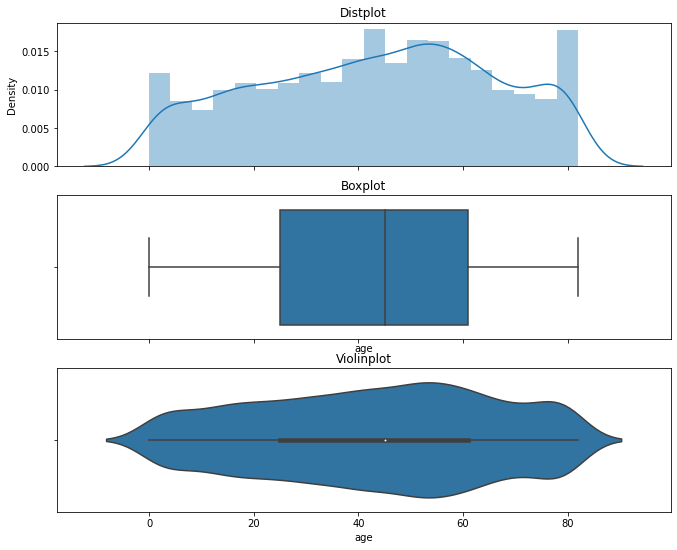

In [504]:
get_categ_plot(stroke_df.age)

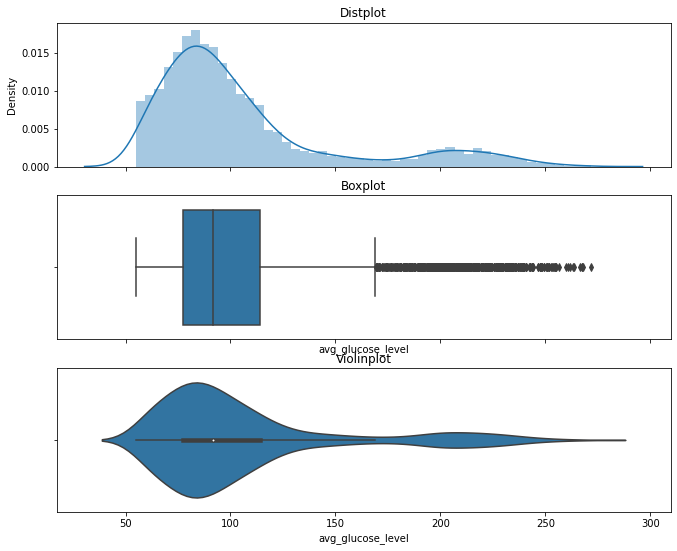

In [505]:
get_categ_plot(stroke_df.avg_glucose_level)

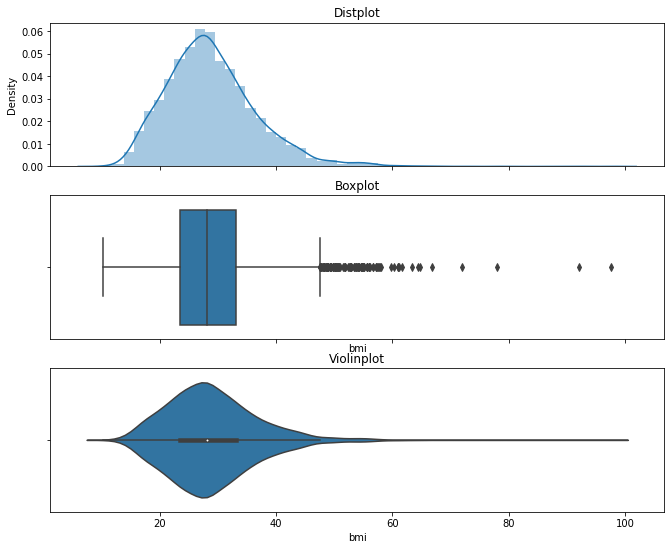

In [506]:
get_categ_plot(stroke_df.bmi)

## Target Variable

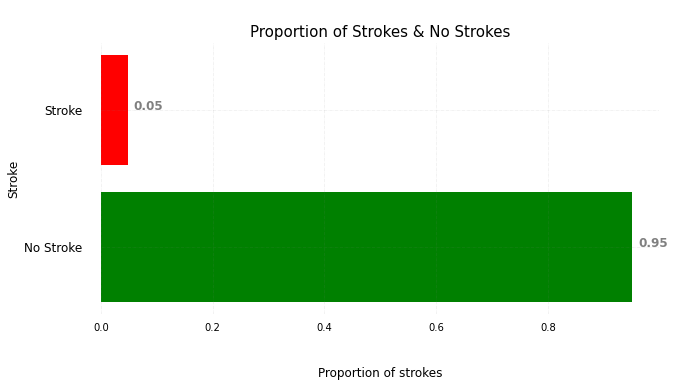

In [507]:
horizontal_bars(['No Stroke', 'Stroke'], 
                [stroke_df.stroke.value_counts(normalize=True)[0], 
                 stroke_df.stroke.value_counts(normalize=True)[1]], 
                '\nProportion of Strokes & No Strokes')

# Bivariate Analysis

## Correlation Matrix

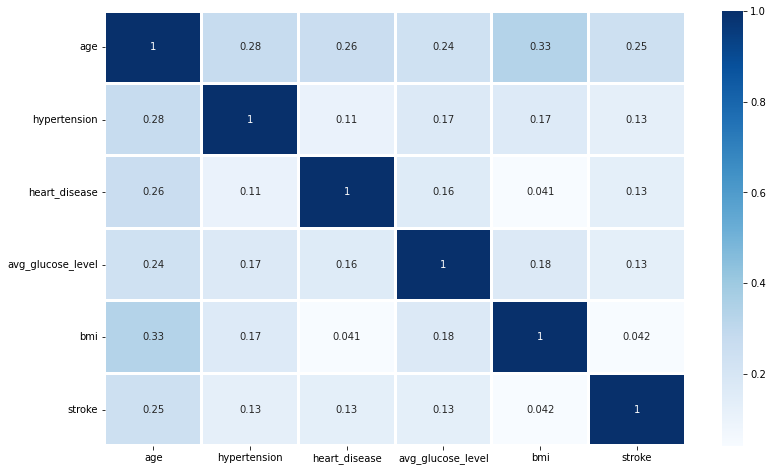

In [508]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(stroke_df.corr(), annot=True, ax=ax, linewidth=2, cmap='Blues')
plt.show()

## Stroke and Categorical

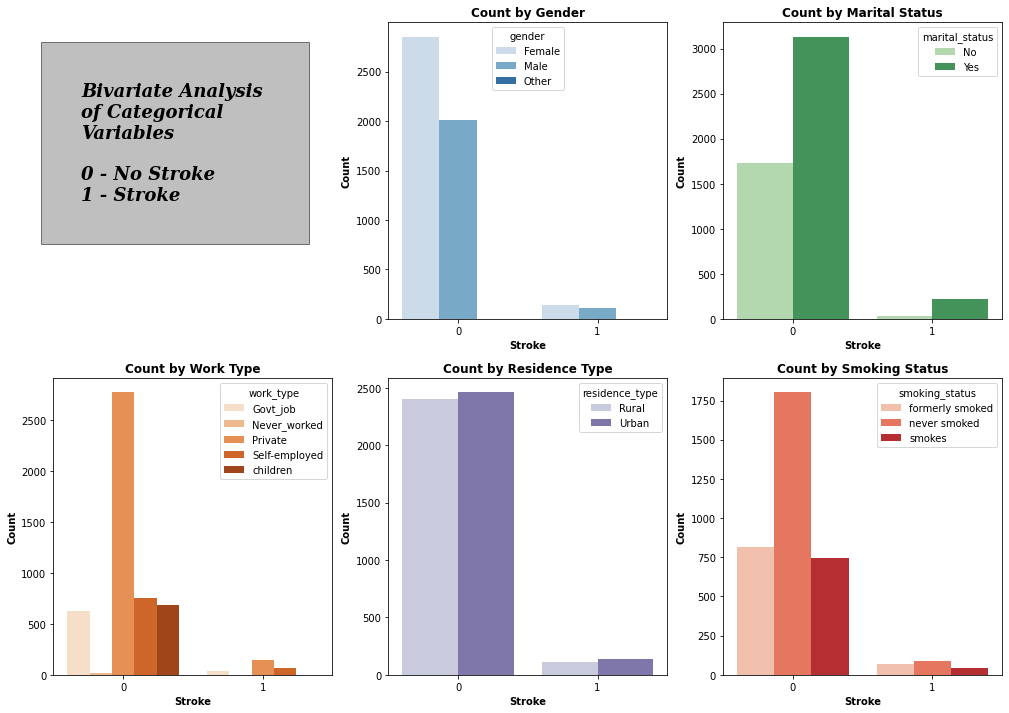

In [509]:
categorical_columns = ['', 'gender', 'marital_status', 'work_type', 'residence_type', 'smoking_status']
palette_color = ['', 'Blues', 'Greens', 'Oranges', 'Purples', 'Reds']

fig, ax = plt.subplots(2, 3, figsize=(17, 12))
for i in range(len(categorical_columns)):
  if i == 0:    
    ax[i // 2,i % 2].text(x=0.1, y=0.4, 
                          s='Bivariate Analysis \nof Categorical \nVariables\n\n0 - No Stroke\n1 - Stroke', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    column = categorical_columns[i]
    extracted_df = stroke_df.groupby([column, 'stroke']).size().reset_index(name='count')
    graph = sns.barplot(data=extracted_df, x='stroke', y='count', 
                      hue=column, palette=palette_color[i], ax=ax[i//3, i%3])

    graph.set_xlabel('Stroke', fontweight='bold')
    graph.set_ylabel('Count', fontweight='bold')
    graph.set_title('Count by ' + ' '.join(column.split('_')).title(), fontweight='bold')

plt.show()














## Stroke and Age

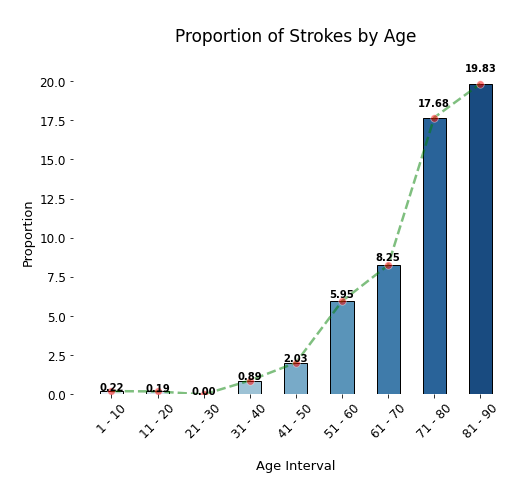

In [510]:
get_barplot(feature = 'age', 
            bin_labels = [str(i) + ' - ' + str(i+9) for i in range(1, 90, 10)], 
            bin_edges = range(0, 100, 10), 
            xlab = 'Age Interval', 
            ylab = 'Proportion', 
            title = 'Proportion of Strokes by Age', 
            line=True)

## Stroke and Average glucose level

Assumed Bio intervals

Range inclusive

*   0-69 Hypoglycemia
*   70-99 Normoglycemia
*   100 - 125 Prediabetes
*   More than 125 - Diabetes 

Reference - https://2.bp.blogspot.com/-QSGz7kZ9k-o/W_F3fA1U9zI/AAAAAAAAC-M/udhZeC1hm-0ppf5zGBAFSkNjOF5HPB0AgCLcBGAs/s1600/blood%2Bglucose%2Blevel%2Bchart.png






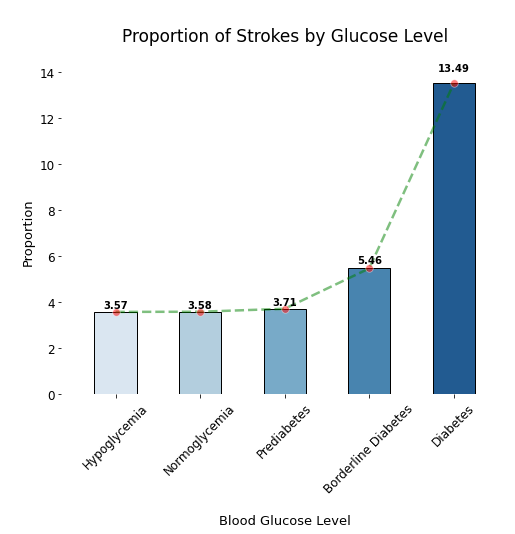

In [511]:
get_barplot(feature = 'avg_glucose_level', 
            bin_labels = ['Hypoglycemia','Normoglycemia','Prediabetes','Borderline Diabetes','Diabetes'], 
            bin_edges = [-1,70,100,126,181,float('inf')], 
            xlab = 'Blood Glucose Level', 
            ylab = 'Proportion', 
            title = 'Proportion of Strokes by Glucose Level', 
            line=True)

## Stroke and BMI

Assumed Bio intervals

Range inclusive

*   less than 18.5 Underweight
*   18.5 - 24.9 Normal
*   25 - 29.9 Overweight
*   30 - 34.9 Obese
*   more than 35 Extremely Obese


Reference- https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg

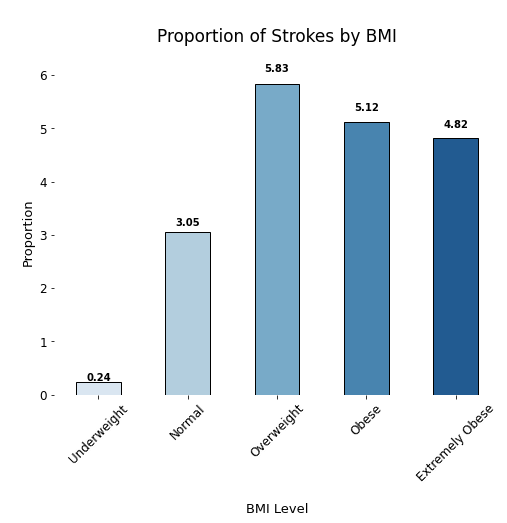

In [512]:
get_barplot(feature = 'bmi', 
            bin_labels = ['Underweight','Normal','Overweight','Obese','Extremely Obese'], 
            bin_edges = [-float('inf'), 19, 26, 31, 36, float('inf')], 
            xlab = 'BMI Level', 
            ylab = 'Proportion', 
            title = 'Proportion of Strokes by BMI', 
            line=False)

## Stroke and Diseases

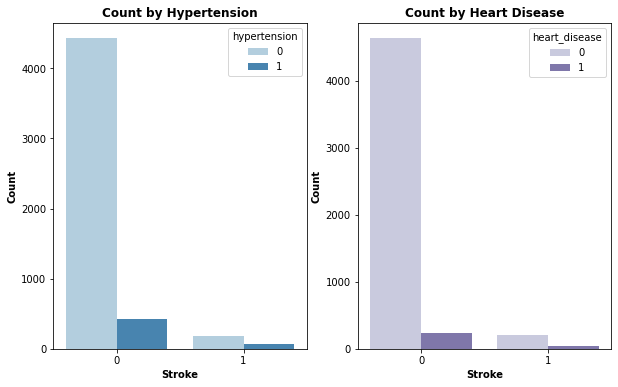

In [513]:
categorical_columns = ['hypertension', 'heart_disease']
palette_color = ['Blues', 'Purples']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    extracted_df = stroke_df.groupby([column, 'stroke']).size().reset_index(name='count')
    graph = sns.barplot(data=extracted_df, x='stroke', y='count', 
                      hue=column, palette=palette_color[i], ax=ax[i%2])

    graph.set_xlabel('Stroke', fontweight='bold')
    graph.set_ylabel('Count', fontweight='bold')
    graph.set_title('Count by ' + ' '.join(column.split('_')).title(), fontweight='bold')

plt.show()

In [514]:
stroke_df.groupby(['hypertension', 'stroke']).size().reset_index(name='count')

,hypertension,stroke,count
0,0,0,4429
1,0,1,183
2,1,0,432
3,1,1,66


# Missing Values

In [515]:
(stroke_df.isna().sum() / len(stroke_df) * 100).sort_values(ascending=False)

smoking_status       30.215264
bmi                   3.933464
stroke                0.000000
avg_glucose_level     0.000000
residence_type        0.000000
work_type             0.000000
marital_status        0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
dtype: float64

In [516]:
stroke_df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
marital_status          0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

Imputing missing values

In [517]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

### Smoking Status

In [518]:
impute_smoking_status = SimpleImputer(strategy='most_frequent').fit_transform(stroke_df[['smoking_status']])
impute_smoking_status

array([['formerly smoked'],
       ['never smoked'],
       ['never smoked'],
       ...,
       ['never smoked'],
       ['formerly smoked'],
       ['never smoked']], dtype=object)

In [519]:
stroke_df['smoking_status'] = pd.DataFrame(impute_smoking_status)

In [520]:
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
marital_status         0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### BMI

In [521]:
imputer = KNNImputer(n_neighbors=3)
impute_bmi = imputer.fit_transform(stroke_df[['bmi']])
impute_bmi

array([[36.6       ],
       [28.89323691],
       [32.5       ],
       ...,
       [30.6       ],
       [25.6       ],
       [26.2       ]])

In [522]:
stroke_df['bmi'] = pd.DataFrame(impute_bmi)

In [523]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
marital_status       0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Label Encoder

In [524]:
from sklearn.preprocessing import LabelEncoder

In [525]:
lab_enc_1 = LabelEncoder()
stroke_df['gender'] = lab_enc_1.fit_transform(stroke_df['gender'])

lab_enc_2 = LabelEncoder()
stroke_df['marital_status'] = lab_enc_2.fit_transform(stroke_df['marital_status'])

lab_enc_3 = LabelEncoder()
stroke_df['residence_type'] = lab_enc_3.fit_transform(stroke_df['residence_type'])

lab_enc_4 = LabelEncoder()
stroke_df['work_type'] = lab_enc_4.fit_transform(stroke_df['work_type'])

lab_enc_5 = LabelEncoder()
stroke_df['smoking_status'] = lab_enc_5.fit_transform(stroke_df['smoking_status'])

In [526]:
stroke_df.head(5)

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,0,1
1,0,61,0,0,1,3,0,202.21,28.893237,1,1
2,1,80,0,1,1,2,0,105.92,32.500000,1,1
3,0,49,0,0,1,2,1,171.23,34.400000,2,1
4,0,79,1,0,1,3,0,174.12,24.000000,1,1


# SMOTE

In [527]:
X = stroke_df.drop('stroke', axis=1)
y= stroke_df['stroke']

In [528]:
# SMOTE method for class imbalance,
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy= 0.4, random_state=42)
X_sm,y_sm = oversample.fit_resample(X,y)
y_sm.value_counts()

0    4861
1    1944
Name: stroke, dtype: int64

In [529]:
# undersampling 
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss(sampling_strategy = 0.7)
X_us, y_us = nearmiss.fit_resample(X_sm, y_sm)
y_us.value_counts()

0    2777
1    1944
Name: stroke, dtype: int64

In [530]:
# X_us['gender'] = lab_enc_1.inverse_transform(X_us['gender'])

In [531]:
X_us['gender'] = lab_enc_1.inverse_transform(X_us['gender'])

X_us['marital_status'] = lab_enc_2.inverse_transform(X_us['marital_status'])

X_us['residence_type'] = lab_enc_3.inverse_transform(X_us['residence_type'])

X_us['work_type'] = lab_enc_4.inverse_transform(X_us['work_type'])

X_us['smoking_status'] = lab_enc_5.inverse_transform(X_us['smoking_status'])

In [532]:
stroke_df = pd.concat([X_us, y_us], axis=1)

In [533]:
stroke_df.head(5)

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61,0,0,Yes,Private,Urban,98.35,26.6,never smoked,0
1,Female,52,0,0,Yes,Private,Rural,97.05,28.0,never smoked,0
2,Female,62,0,0,Yes,Private,Rural,203.57,29.1,never smoked,0
3,Male,78,0,0,Yes,Private,Urban,74.70,28.8,formerly smoked,0
4,Female,39,0,0,Yes,Private,Rural,83.51,26.4,never smoked,0


In [534]:
for i in ['gender','marital_status','residence_type','work_type','smoking_status']:
  print(i,'\t',stroke_df[i].unique())

gender 	 ['Female' 'Male']
marital_status 	 ['Yes' 'No']
residence_type 	 ['Urban' 'Rural']
work_type 	 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status 	 ['never smoked' 'formerly smoked' 'smokes']


In [535]:
stroke_df.shape

(4721, 11)

In [536]:
y_us.value_counts()

0    2777
1    1944
Name: stroke, dtype: int64

# Pipeline

## Importing Libraries

In [537]:
!pip install delayed --q
!pip install --upgrade scikit-learn --q

import timeit

from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    ParameterGrid
)

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder,
    MinMaxScaler, 
    RobustScaler
)

from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

from sklearn import set_config

     |████████████████████████████████| 85 kB 2.2 MB/s 
     |████████████████████████████████| 119 kB 11.8 MB/s 


## Dataset

In [538]:
stroke_df.head()

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61,0,0,Yes,Private,Urban,98.35,26.6,never smoked,0
1,Female,52,0,0,Yes,Private,Rural,97.05,28.0,never smoked,0
2,Female,62,0,0,Yes,Private,Rural,203.57,29.1,never smoked,0
3,Male,78,0,0,Yes,Private,Urban,74.70,28.8,formerly smoked,0
4,Female,39,0,0,Yes,Private,Rural,83.51,26.4,never smoked,0


In [539]:
X = stroke_df.drop('stroke', axis=1)
y = stroke_df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3304, 10), (1417, 10), (3304,), (1417,))

In [540]:
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns

print(f'Numerical Features are {list(numerical_features)}')
print(f'Categorical Features are {list(categorical_features)}')

Numerical Features are ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical Features are ['gender', 'marital_status', 'work_type', 'residence_type', 'smoking_status']


## Building Pipeline

In [541]:
class DummyEstimator(BaseEstimator):
  def fit(self): pass
  def transform(self): pass
  def score(self): pass

In [542]:
numerical_transformer_steps = [
                               ('imputer', KNNImputer()),
                               ('scaler', 'passthrough'),
                               ('decomp', 'passthrough')
]

numerical_transformer = Pipeline(steps=numerical_transformer_steps)

In [543]:
categorical_transformer_steps = [
                                 ('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('onehot', OneHotEncoder(handle_unknown='ignore'))
]

categorical_transformer = Pipeline(steps=categorical_transformer_steps)

In [544]:
column_transformer_steps = [
                            ('numerical', numerical_transformer, numerical_features),
                            ('categorical', categorical_transformer, categorical_features)
]

col_transformer = ColumnTransformer(transformers=column_transformer_steps)

In [545]:
estimators = [('column_trans', col_transformer), ('clf', DummyEstimator())]
pipe = Pipeline(estimators)

## Best Parameter Selection

In [546]:
param_grid = [
    {
        'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
        'clf': [SVC()],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [10, 100, 200],
        'clf__criterion': ['gini', 'entropy']
    },
    {
        'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
        'clf': [SGDClassifier()],
        'clf__penalty': ['l2', 'l1', 'elasticnet'],
    },
    {
         'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
         'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
         'clf': [KNeighborsClassifier()],
         'clf__n_neighbors': [5, 10, 15],
         'clf__weights': ['uniform', 'distance'] 
     },
     {
         'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
         'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
         'clf': [GaussianNB()],
     },
     {
         'column_trans__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
         'column_trans__numerical__decomp': [PCA(), KernelPCA(), TruncatedSVD()],
         'clf': [DecisionTreeClassifier()],
         'clf__criterion': ['gini', 'entropy'],
         'clf__min_samples_split': [2, 3, 4] 
     }
]

In [547]:
parametergrid = ParameterGrid(param_grid)
print(f'Total combinaions: {len(parametergrid)}')

Total combinaions: 270


In [548]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                           n_jobs=1, error_score='raise', verbose=2, return_train_score=True)

start = timeit.default_timer()
grid_search.fit(X_train, y_train);
stop = timeit.default_timer()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_trans__numerical__scaler=StandardScaler(); total time=   0.4s
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_trans__numerical__scaler=StandardScaler(); total time=   0.4s
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_trans__numerical__scaler=StandardScaler(); total time=   0.7s
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_trans__numerical__scaler=StandardScaler(); total time=   0.4s
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_trans__numerical__scaler=StandardScaler(); total time=   0.3s
[CV] END clf=SVC(), clf__gamma=scale, clf__kernel=linear, column_trans__numerical__decomp=PCA(), column_tr

In [549]:
print(f'Time taken: {(stop - start)/60} minutes')

Time taken: 40.926104874283325 minutes


In [550]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'clf': RandomForestClassifier(n_estimators=200), 'clf__criterion': 'gini', 'clf__n_estimators': 200, 'column_trans__numerical__decomp': KernelPCA(), 'column_trans__numerical__scaler': MinMaxScaler()}


In [551]:
print(f'Highest accuracy: {grid_search.best_score_}')

Highest accuracy: 0.8616815660386008


In [552]:
grid_search.best_estimator_

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('decomp',
                                                                   KernelPCA())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                           

## Accuracy of Best Model

In [553]:
accuracy_score(y_test, grid_search.predict(X_test))

0.8743824982357092

## HTML Representation of Best Pipeline

In [554]:
set_config(display='diagram')
grid_search.best_estimator_

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('decomp',
                                                                   KernelPCA())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'marital_status', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(n_estimators=200))])

# Training Best Model

In [555]:
best_model = Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('decomp',
                                                                   PCA())]),
                                                  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'marital_status', 'work_type', 'residence_type', 'smoking_status'])])),
                ('clf', SVC(kernel='linear'))])

best_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('decomp',
                                                                   PCA())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'marital_status',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('clf', SVC(kernel='linear'))])

In [556]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# from imblearn.over_sampling import SMOTENC

# X_train_imput_num = KNNImputer().fit_transform(X_train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']])
# X_train_scale_num = StandardScaler().fit_transform(X_train_imput_num)
# X_train_decom_num = pd.DataFrame(PCA(n_components = 2).fit_transform(X_train_scale_num))

# X_train_imput_cat = SimpleImputer(strategy='most_frequent').fit_transform(X_train[['gender', 'marital_status', 'work_type', 'residence_type', 'smoking_status']])
# X_train_hot_cat = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(X_train_imput_cat).toarray())

# X_train_final = pd.concat([X_train_decom_num, X_train_hot_cat], axis=1)

# smote_nc = SMOTENC(categorical_features = False, random_state=0)
# X_resampled, y_resampled = smote_nc.fit_resample(X_train_final, y_train.values.reshape(-1, 1))

# model = SVC(kernel='linear').fit(X_train_final, y_train)

In [557]:
# X_train_final.shape

# Save Best Model

In [558]:
from joblib import dump

In [559]:
dump(best_model, filename="stroke_model.joblib")
best_model.score(X_test, y_test)

0.7769936485532816

# Assumptions



We are assuming unit of average glucose level in blood to be mg/dl (miligram/decilitre) and we have taken fasting glucose level bio reference interval